In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time

from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_key import api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
filepath =  "output_data_cities.csv"
df = pd.read_csv(filepath)

df.head()

,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,0,Dingle,11.00,122.67,83.41,77,0,5.82
1,1,Puerto Madryn,-42.77,-65.04,66.79,47,0,5.82
2,2,Hithadhoo,-0.60,73.08,81.82,79,0,5.82
3,3,Klaksvík,62.23,-6.59,50.00,93,0,5.82
4,4,Albany,42.60,-73.97,42.66,71,0,5.82


In [3]:
df.info

<bound method DataFrame.info of      Unnamed: 0           City  Latitude  Longitude  Temperature  Humidity  \
0             0         Dingle     11.00     122.67        83.41        77   
1             1  Puerto Madryn    -42.77     -65.04        66.79        47   
2             2      Hithadhoo     -0.60      73.08        81.82        79   
3             3       Klaksvík     62.23      -6.59        50.00        93   
4             4         Albany     42.60     -73.97        42.66        71   
..          ...            ...       ...        ...          ...       ...   
545         545     Strezhevoy     60.73      77.59        19.40        85   
546         546     Saint John     45.27     -66.07        47.88        81   
547         547      Kysyl-Syr     63.90     122.76         9.99        95   
548         548     Quang Ngai     15.12     108.80        72.68        87   
549         549          Khovd     48.01      91.64        30.76        75   

     Cloudiness  Wind Speed  
0

In [4]:
df.shape

(550, 8)

In [5]:
# #for col in df.columns:
#     if(df[col].type == np.float64 or df[col].dtype == np.int64.dtype == np.int64):
#         plt.figure(figsize=(10,6))

#         plt.hist(df[col], color = "blue", alpha=0.8)
#         plt.title(f"Histogram of {col}", fontsize=16, fontweight="bold", fontname=)
#         plt.xlabel("Mouse Weight (g)")
#         plt.ylabel("Tumor Size (mm3)")

#         plt.show()    

In [6]:
 # linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

x = df["Latitude"]
y = df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x, y)

print(slope, intercept)

# y = m*x + b

lineFt = slope * df['Latitude'] + intercept
lineFt

-0.5373175585703484 66.19353449833923


0      60.283041
1      89.174606
2      66.515925
3      32.756263
4      43.303807
         ...    
545    33.562239
546    41.869169
547    31.858943
548    58.069293
549    40.396919
Name: Latitude, Length: 550, dtype: float64

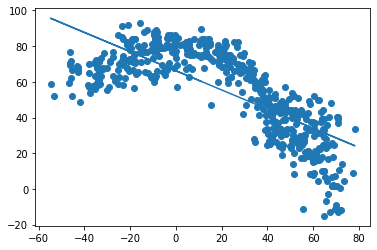

In [7]:

plt.scatter(x, y)
plt.plot(x, lineFt)

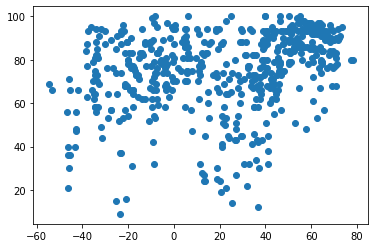

In [8]:
x = df["Latitude"]
y = df["Humidity"]
plt.scatter(x, y)

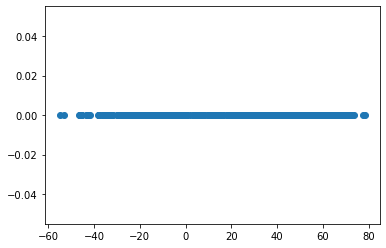

In [9]:
x = df["Latitude"]
y = df["Cloudiness"]
plt.scatter(x, y)

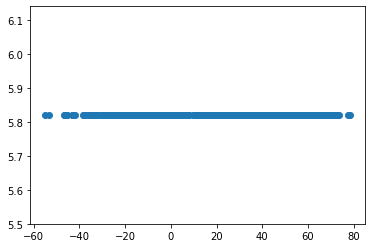

In [10]:
x = df["Latitude"]
y = df["Wind Speed"]
plt.scatter(x, y)

In [11]:
# plt.figure(figsize=(10,6))

# plt.hist(df[col], color = "firebrick", alpha=0.8)
# plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Adobe Arabic")
# plt.xlabel(col)
# plt.ylabel("Count")

# plt.show()

In [12]:
def plotWeather(x, y):   

    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x, y)    
    # y = m*x + b

    lineFt = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, lineFt)
    plt.show()



In [13]:
cond = df['Latitude'] > 0
north_df = df[cond]
south_df = df[~cond]

north_df['Latitude'].nunique()

south_df['Latitude']

1     -42.77
2      -0.60
5     -24.79
7     -46.19
8     -15.86
       ...  
524    -5.20
526    -7.71
534    -8.61
541    -3.33
542   -23.70
Name: Latitude, Length: 176, dtype: float64

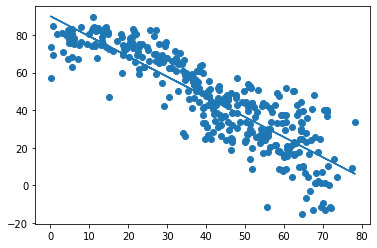

In [14]:
plotWeather(north_df["Latitude"], north_df["Temperature"])


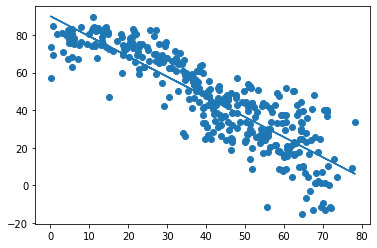

In [15]:
plotWeather(north_df["Latitude"], north_df["Temperature"])
#Closer get to Equator the higher the temperature

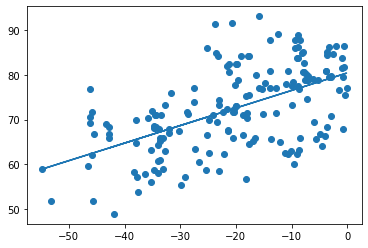

In [16]:
plotWeather(south_df["Latitude"], south_df["Temperature"])
#Closer get to Equator the higher the temperature

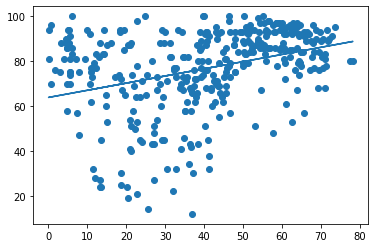

In [17]:
plotWeather(north_df["Latitude"], north_df["Humidity"])
#Higher humidity as get away from Equator

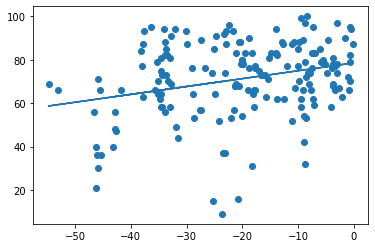

In [18]:
plotWeather(south_df["Latitude"], south_df["Humidity"])
#Higher humidity as closer get to equator

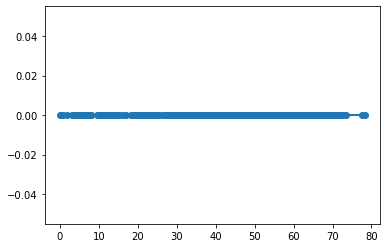

In [19]:
plotWeather(north_df["Latitude"], north_df["Cloudiness"])
#Latitude has no affect on Cloudiness

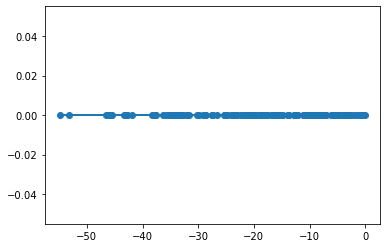

In [20]:
plotWeather(south_df["Latitude"], south_df["Cloudiness"])
#Latitude has no affect on Cloudiness

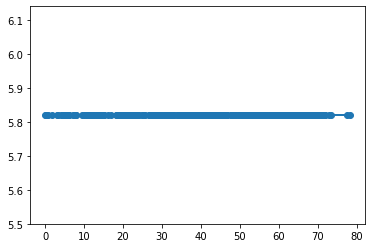

In [21]:
plotWeather(north_df["Latitude"], north_df["Wind Speed"])
#Latitude has no affect on wind speed

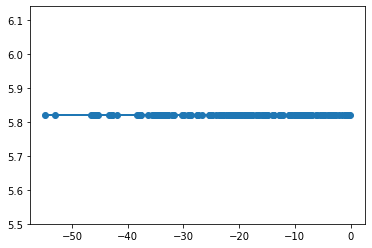

In [22]:
plotWeather(south_df["Latitude"], south_df["Wind Speed"])

#Latitude has no affect on wind speed